# Лабораторная работа №7. Решение задачи Коши
### Выполнил: Щелоков Никита

Целью данной работы является решение следующего дифференциального уравнения при заданных начальных условиях:

$$\begin{gather}
y''+16y'-16y=sin(4x)\cdot e^{x} \\
y(0)=1, \quad y'(0)=0, \quad x\in[0,2] \ \label{eq:Xi} \\ 
\end{gather}$$

In [79]:
import matplotlib.pylab
from pylab import *
from numpy.linalg import *

## Решение ДУ численно, разностным методом по неявной симметричной схеме

Рассмотрим наше ДУ, переписав его в виде системы (введя обозначения $z=y'$):

$$
\begin{cases} 
y'+(-z)=0\\
z'+(16z-16y)=sin(4x)\cdot e^{x}
\end{cases}
$$

Каноническая модельная задача для разностной схемы записывается в виде

$$
\begin{cases} 
u'+A(x)u=\varphi(x), \quad x>0\\
u(0)=u0
\end{cases}
$$

где $\phi(x), u$ - вектора размерности порядка уравнения $s$, а $A(x)$ - матрица $x\times s$. Для нашего ураванения нетрудно видеть, что 

$$
u=\begin{bmatrix} 
y\\z
\end{bmatrix},
\quad
\varphi=\begin{bmatrix} 
0\\\ sin(4x)\cdot e^{x}
\end{bmatrix},
\quad
A=\begin{bmatrix} 
0 & -1\\
-16 & 16
\end{bmatrix}.
$$

Решение задачи Коши **симметричной неявной схемой** осуществляется решением относительно $y_{n+1}$ на каждом шаге ($n$) СЛАУ:

$$
\begin{cases}
\frac{y_{n+1}-y_{n}}{h}+\frac12 A(y_n+y_{n+1})=\varphi_n\\
n=0,1,2,...,\,\,y_0=u_0
\end{cases}
$$

Перепишем СЛАУ в виде "$Mx=N$":

$$
(E+\frac12hA)y_{n+1}=h\varphi_n+y_n-\frac12hAy_n
$$

In [99]:
def phi(x):
    return array([0, sin(4 * x) * exp(x)])

A = array([[0, -1], [-16, 16]])
E = np.identity(2)

xmin, xmax = 0,2
h = (xmax - xmin) / 2


def solver(h):
    current_x = xmin
    current_y = [1,0]

    x, y, yy = np.array([current_x]), np.array([current_y[0]]), np.array(
        [current_y[1]])

    while (current_x < xmax):
        M = E + 1 / 2 * h * A
        N = h * phi(current_x) + current_y - 1 / 2 * h * np.dot(A, current_y)

        current_y = solve(M, N)

        x = np.append(x, current_x)
        y = np.append(y, current_y[0])
        yy = np.append(yy, current_y[1])

        current_x += h
    return x, y, yy


e = 0.01
x, y, yy = solver(e)

## Решение ДУ численно встроенными функциями SciPy

In [100]:
from scipy.integrate import odeint, solve_ivp

def model(x, yarr):
    y = yarr[0]
    z = yarr[1]
    return [z, (sin(4 * x) * exp(x) - 16 * z + 16 * y)]

sols = solve_ivp(model, [0,100], [1,0],first_step=e, max_step=e)
x2 = sols.t
y2 = sols.y[0]
yy2 = sols.y[1]

Чтобы убедиться в том, что погрешность действительно мала, ниже представлены 
графики зависимости y(x), y'(x) и фазовые траектории для решений уравнений.

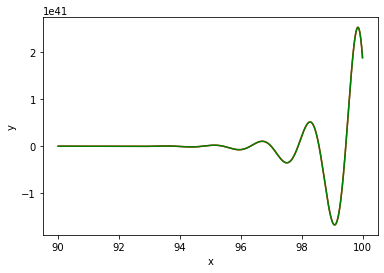

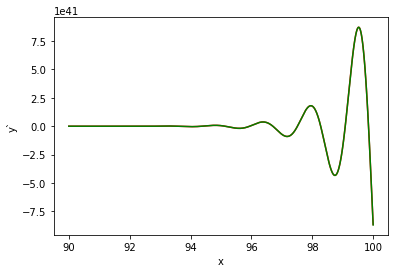

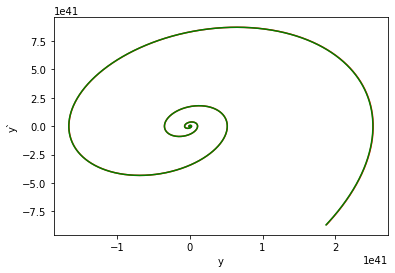

In [101]:
plot(x,y,'red')
plot(x2,y2,'green')
xlabel('x')
ylabel('y')
show()

plot(x,yy,'red')
plot(x2,yy2,'green')
xlabel('x')
ylabel('y`')
show()

plot(y,yy,'red')
plot(y2,yy2,'green')
xlabel('y')
ylabel('y`')
show()

Теперь мы можем сравнить наши решения. В блоке ниже представлены разности двух методов.

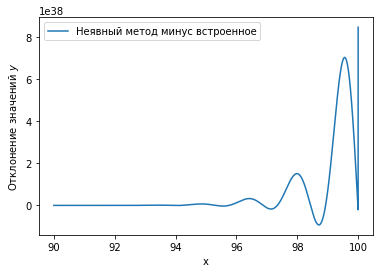

In [105]:
delta=np.interp(x2, x, y)-np.interp(x2, x2, y2)
plot(x2,delta,label='Неявный метод минус встроенное')
ylabel('Отклонение значений $y$')
xlabel('x')
legend()
show()

## Вывод
В результате выполнения работы была решена задача Коши для заданного дифференциального уравнения: численно, и с помощью модуля SciPy.